# LoanTap Logistic Regression Case_study

# About LoanTap

* LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise   dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

* The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as       individuals.

* LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

  *  Personal Loan
  *  EMI Free Loan
  *  Personal Overdraft
  *  Advance Salary Loan
* This case study will focus on the underwriting process behind Personal Loan only

# Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?


# Dataset 


* loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department         reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.*
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means       ten or more years.
* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual


# Problem definition

Given the information about the customer, Predict whether loan should be given to them

In [1]:
# Analysis
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [53]:
df=pd.read_csv('LoanTap.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [54]:
df.shape

(396030, 27)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [57]:
#calculating Total missing values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [58]:
df.isnull().sum()/len(df.index)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

Here, we can see That 'emp_title','emp_length','mort_acc' has significant NULLs in them. Rest all features are having very less no of Nulls. we can drop them.

emp_title ---- it is a categorical variable

emp_length ---- it is a categorical variable

mort_acc ----- it is numerical variable

In [59]:
# We can impute median value for NAN values for Numerical Variable
df['mort_acc'].fillna(df['mort_acc'].median(), inplace = True)

In [60]:
# AS this is categorical data we will fill it with mode of columns
df['emp_title'].fillna(df['emp_title'].mode()[0], inplace = True)

In [61]:
#As it relates to years we will replace null values with 5 years as it is means of [0-10]
df['emp_length'].fillna('5 years', inplace = True)

In [62]:
# Remaining null values are very less so that we can remove them
df=df.dropna()

In [63]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [64]:
# Dupluicate value check
if df.shape[0] == df.drop_duplicates().shape[0] :
    print('No duplicates Found')
else:
    duplicates = df.shape[0] - df.drop_duplicates().shape[0]
    print('{} duplicates found'.format(duplicates))

No duplicates Found


# Observations:

* NO missing Values after imputing them.
* We can proceed further using this data.

# Feature Engineering

* Need to Rename some names and convert them into More Readable way
* Need to convert some Features from Categorical into numerical value for training model.
* Need to check the date type columns and convert them Accordingly into months,years and dates.

In [65]:
#as data is not readable we should change the names for easy readable.
df['emp_length'].value_counts()

10+ years    125270
5 years       44429
2 years       35597
< 1 year      31489
3 years       31469
1 year        25637
4 years       23811
6 years       20750
7 years       20727
8 years       19071
9 years       15215
Name: emp_length, dtype: int64

In [66]:
df['emp_length'] = df ['emp_length'].replace ( ['< 1 year'],'0 year')
df['emp_length'] = df ['emp_length'].replace ( ['10+ years'],'10 years')

In [67]:
df['emp_length'].value_counts()

10 years    125270
5 years      44429
2 years      35597
0 year       31489
3 years      31469
1 year       25637
4 years      23811
6 years      20750
7 years      20727
8 years      19071
9 years      15215
Name: emp_length, dtype: int64

In [68]:
# Converting them '10 years' into 10 (converting object type to int type)
df['emp_length']=df['emp_length'].apply(lambda x:x.split(' ')[0])
df['emp_length']=df['emp_length'].astype(int)

In [69]:
df['loan_status']=df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

In [70]:
df.drop(['issue_d','earliest_cr_line'],inplace=True,axis='columns')

In [71]:
df['address'][0]

'0174 Michelle Gateway\r\nMendozaberg, OK 22690'

In [72]:
# we can get Pincode from address as we can decide the area and state from pincode

df['address']=df['address'].apply(lambda x:x.split(' ')[-1])

In [73]:
df.head().T

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10,4,0,6,9
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


In [74]:
df.describe(include='object').T

,count,unique,top,freq
term,393465,2,36 months,300024
grade,393465,7,B,115395
sub_grade,393465,35,B3,26518
emp_title,393465,172226,Teacher,27036
home_ownership,393465,6,MORTGAGE,197110
verification_status,393465,3,Verified,138867
purpose,393465,14,debt_consolidation,233108
title,393465,48472,Debt consolidation,152392
initial_list_status,393465,2,f,236947
application_type,393465,3,INDIVIDUAL,392844


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,393465.0,14117.269960,8353.190693,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,393465.0,13.638728,4.468866,5.32,10.49,13.33,16.49,30.99
installment,393465.0,431.946979,250.582348,16.08,250.33,375.43,567.49,1533.81
emp_length,393465.0,5.897396,3.565170,0.00,3.00,6.00,10.00,10.00
annual_inc,393465.0,74212.294265,61628.502516,0.00,45000.00,64000.00,90000.00,8706582.00
loan_status,393465.0,0.803810,0.397115,0.00,1.00,1.00,1.00,1.00
dti,393465.0,17.383396,18.061993,0.00,11.29,16.91,22.98,9999.00
open_acc,393465.0,11.317601,5.133143,1.00,8.00,10.00,14.00,90.00
pub_rec,393465.0,0.178189,0.530628,0.00,0.00,0.00,0.00,86.00
revol_bal,393465.0,15849.758057,20552.685648,0.00,6042.00,11194.00,19630.00,1743266.00


# Observations:

* Filled all missing Values.
* Dropped date columns because no impact will be there in model.
* Derived pincode from Address to find the loan status across states 
* Converted emp_legth from object to int type. 

In [76]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'title', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [77]:
df_numerical=df.select_dtypes(exclude='object')
df_categorical=df.select_dtypes(include='object')

In [78]:
df_numerical.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [79]:
df_categorical.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'purpose', 'title', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

# Univariate Analysis

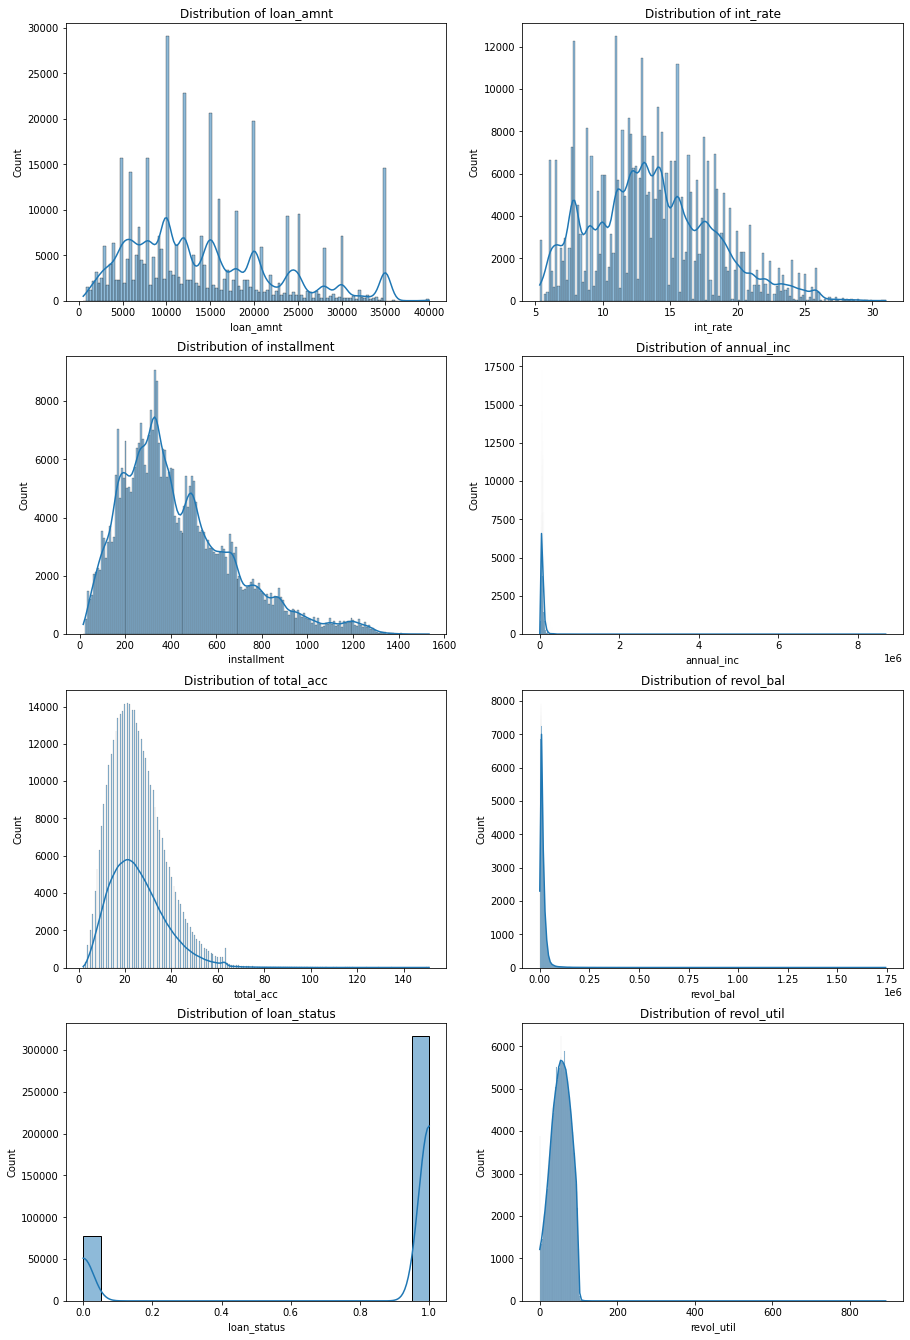

In [80]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
fig.subplots_adjust(top=1.9)

sns.histplot(data=df, x="loan_amnt", kde=True, ax=axis[0,0])
axis[0,0].set_title('Distribution of loan_amnt')
sns.histplot(data=df, x="int_rate", kde=True, ax=axis[0,1])
axis[0,1].set_title('Distribution of int_rate')
sns.histplot(data=df, x="installment", kde=True, ax=axis[1,0])
axis[1,0].set_title('Distribution of installment')
sns.histplot(data=df, x="annual_inc", kde=True, ax=axis[1,1])
axis[1,1].set_title('Distribution of annual_inc')
sns.histplot(data=df, x="total_acc", kde=True, ax=axis[2,0])
axis[2,0].set_title('Distribution of total_acc')
sns.histplot(data=df, x="revol_bal", kde=True, ax=axis[2,1])
axis[2,1].set_title('Distribution of revol_bal')
sns.histplot(data=df, x="loan_status", kde=True, ax=axis[3,0])
axis[3,0].set_title('Distribution of loan_status')
sns.histplot(data=df, x="revol_util", kde=True, ax=axis[3,1])
axis[3,1].set_title('Distribution of revol_util')
plt.show()

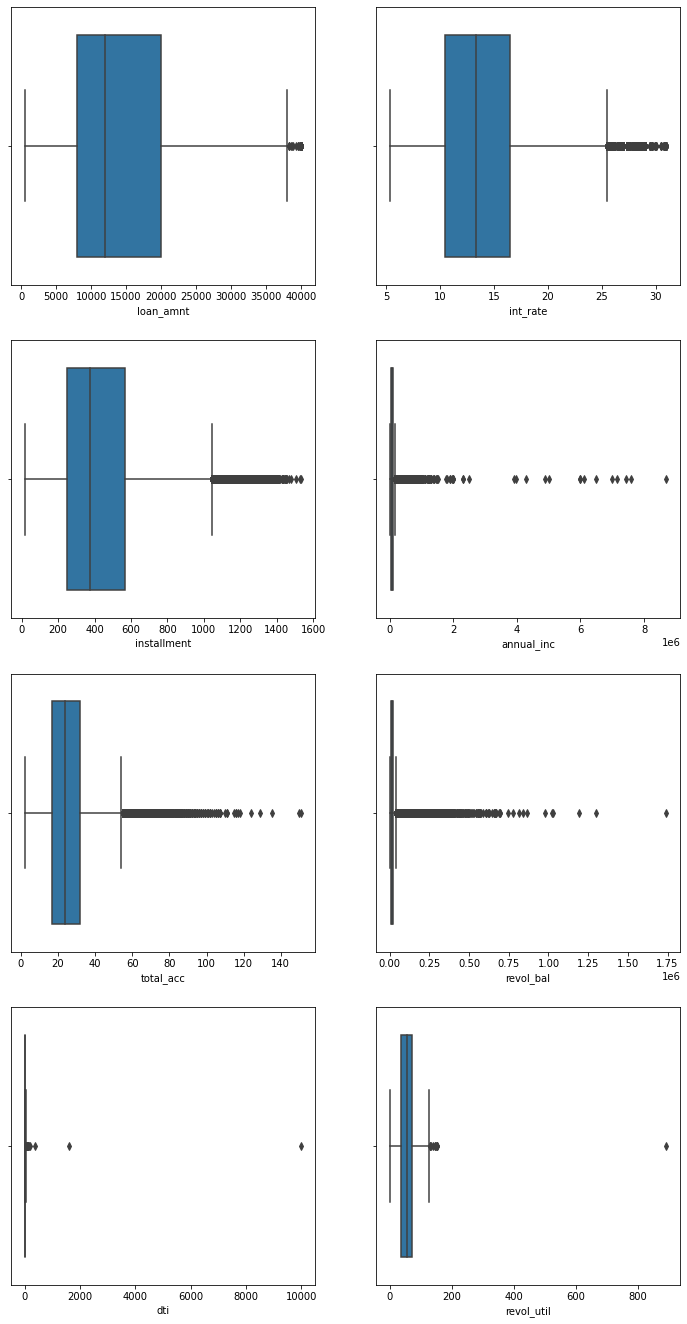

In [84]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.9)

sns.boxplot(data=df, x="loan_amnt", ax=axis[0,0])
sns.boxplot(data=df, x="int_rate", ax=axis[0,1])
sns.boxplot(data=df, x="installment", ax=axis[1,0])
sns.boxplot(data=df, x="annual_inc", ax=axis[1,1])
sns.boxplot(data=df, x="total_acc", ax=axis[2,0])
sns.boxplot(data=df, x="revol_bal", ax=axis[2,1])
sns.boxplot(data=df, x="dti", ax=axis[3,0])
sns.boxplot(data=df, x="revol_util", ax=axis[3,1])
plt.show()

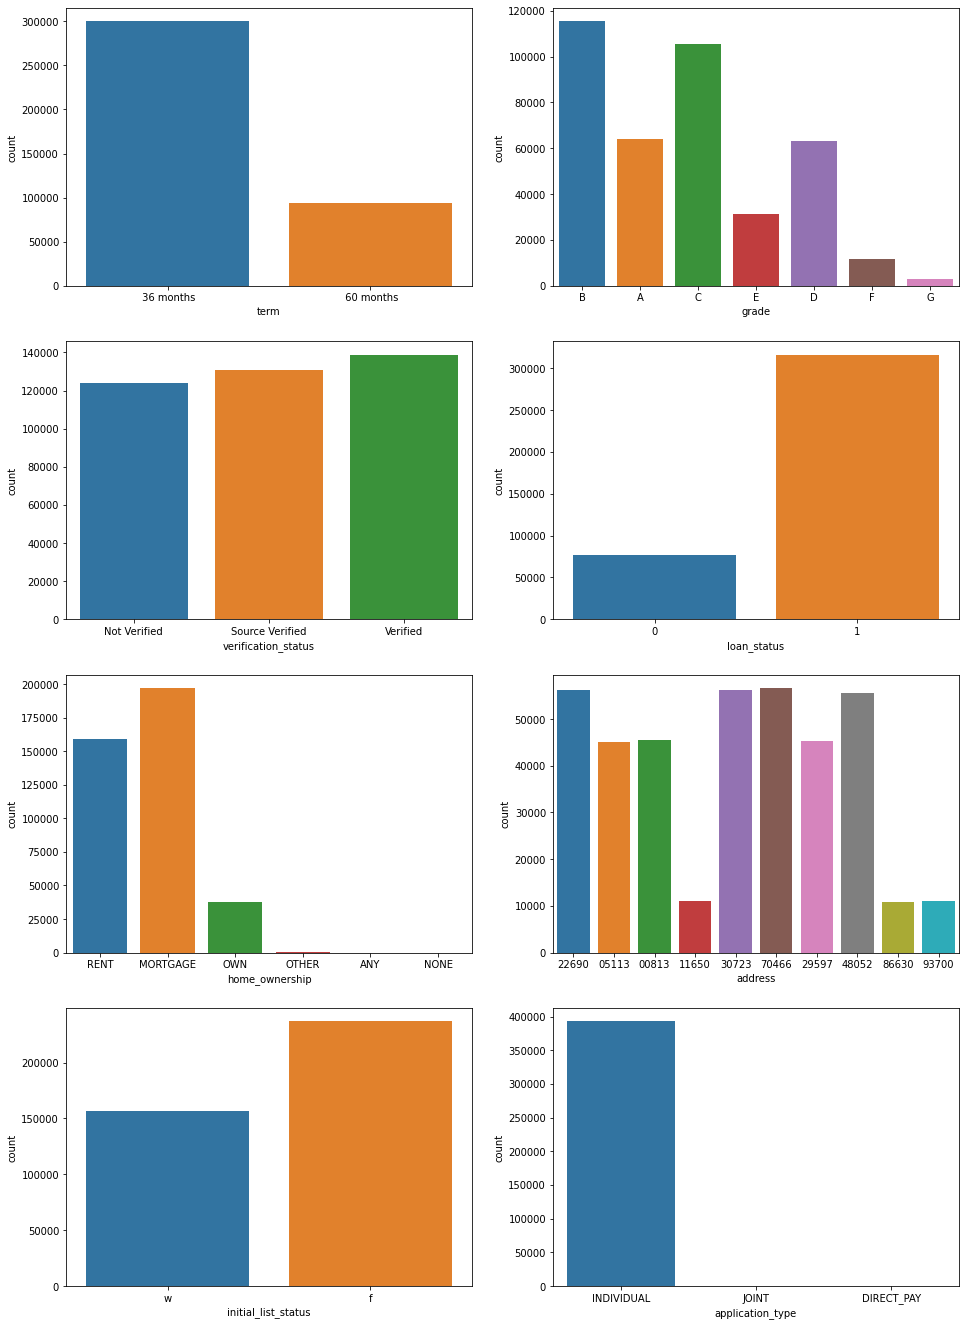

In [85]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(16, 10))
fig.subplots_adjust(top=1.9)

sns.countplot(data=df, x="term", ax=axis[0,0])
sns.countplot(data=df, x="grade", ax=axis[0,1])
sns.countplot(data=df, x="verification_status", ax=axis[1,0])
sns.countplot(data=df, x="loan_status", ax=axis[1,1])
sns.countplot(data=df, x="home_ownership", ax=axis[2,0])
sns.countplot(data=df, x="address", ax=axis[2,1])
sns.countplot(data=df, x="initial_list_status", ax=axis[3,0])
sns.countplot(data=df, x="application_type", ax=axis[3,1])
plt.show()

# Observations:

* Most of the loans are taken for 36 months term.
* Most of the verified data is present in data.
* Mortagage houses are more compared to rent and own.
* Major of the loan application is INDIVIDUAL.
* Major of loan applications are coming from "70466" pincode area.
* There are some Outliers which need to be removed before Fitting the data into Model.
* The average of loan amount taken by loan applicants is around 14000 to 15000.
* 80% of loan applicants are full paid there loan according to data
* 60% of loan applicants initail list status is 'f'.

# Bivariate and Multivariate Analysis

<AxesSubplot:xlabel='application_type', ylabel='loan_status'>

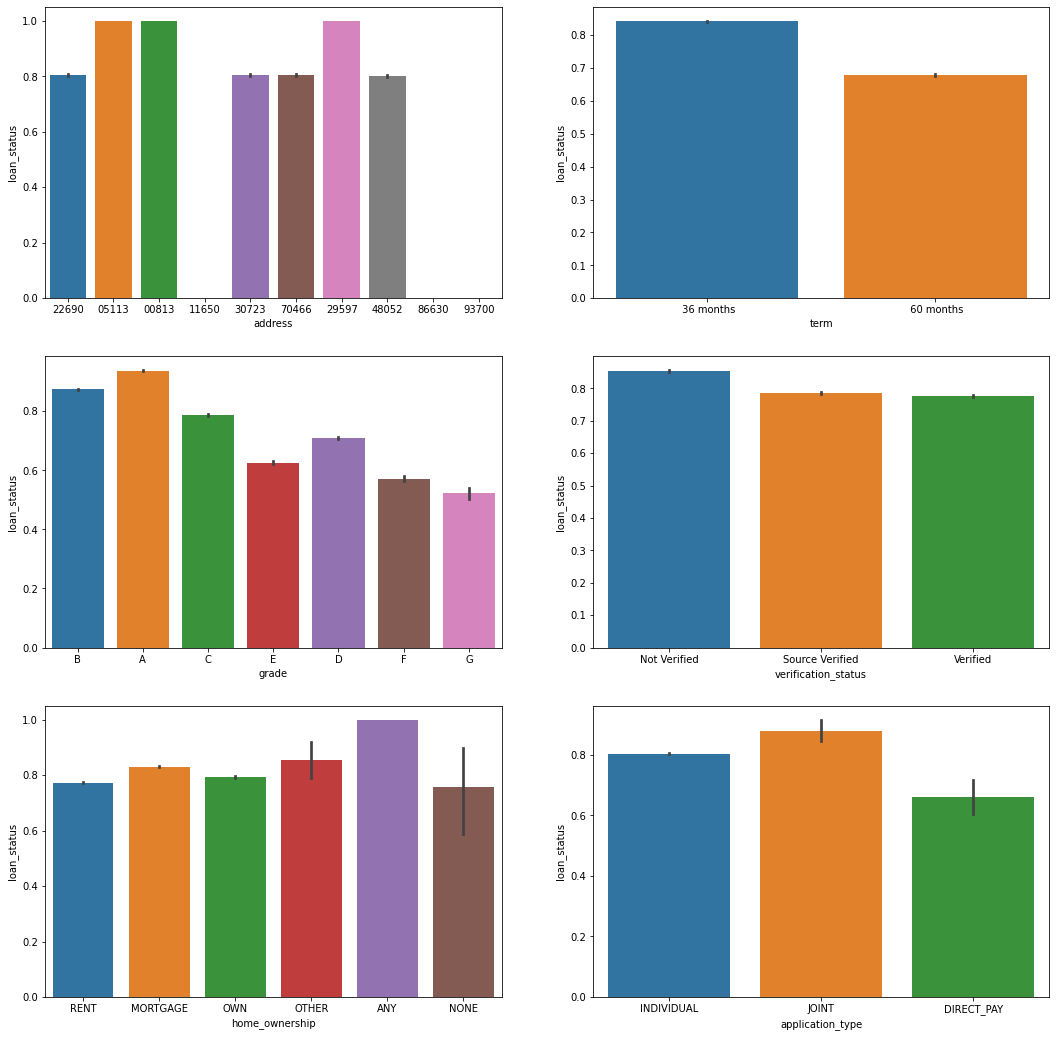

In [86]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.5)

sns.barplot(x='address', y='loan_status', data=df, ax=axis[0,0])
sns.barplot(x='term', y='loan_status', data=df, ax=axis[0,1])
sns.barplot(x='grade', y='loan_status', data=df, ax=axis[1,0])
sns.barplot(x='verification_status', y='loan_status', data=df, ax=axis[1,1])
sns.barplot(x='home_ownership', y='loan_status', data=df, ax=axis[2,0])
sns.barplot(x='application_type', y='loan_status', data=df, ax=axis[2,1])

<AxesSubplot:xlabel='application_type', ylabel='loan_amnt'>

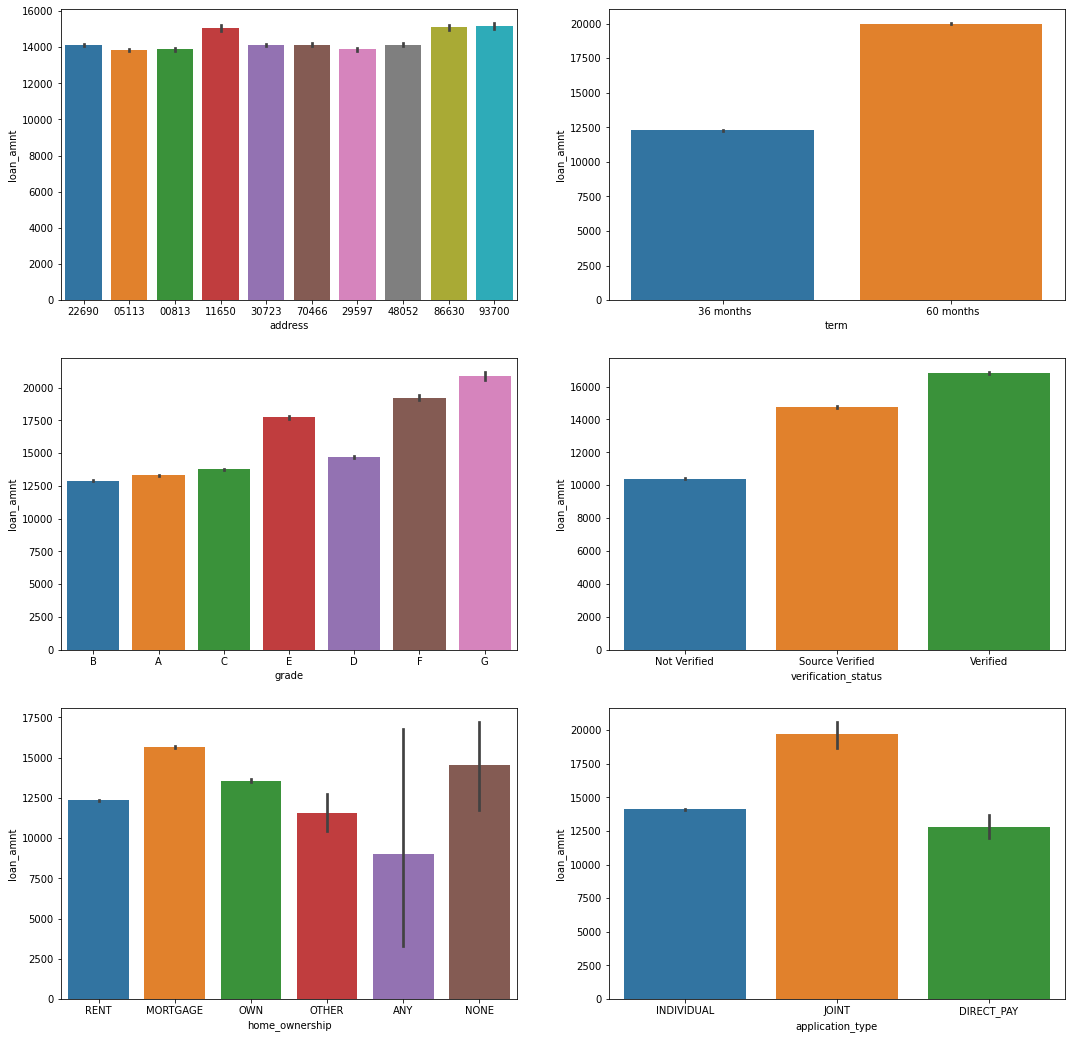

In [87]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.5)

sns.barplot(x='address', y='loan_amnt', data=df, ax=axis[0,0])
sns.barplot(x='term', y='loan_amnt', data=df, ax=axis[0,1])
sns.barplot(x='grade', y='loan_amnt', data=df, ax=axis[1,0])
sns.barplot(x='verification_status', y='loan_amnt', data=df, ax=axis[1,1])
sns.barplot(x='home_ownership', y='loan_amnt', data=df, ax=axis[2,0])
sns.barplot(x='application_type', y='loan_amnt', data=df, ax=axis[2,1])

In [88]:
## correlation matrix for heat map
df.corr()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168264,0.953884,0.101544,0.337056,-0.060055,0.016344,0.198354,-0.078206,0.328779,0.099682,0.223821,0.222332,-0.106646
int_rate,0.168264,1.000000,0.161980,0.011281,-0.056884,-0.247960,0.078199,0.011820,0.060980,-0.011215,0.293724,-0.036589,-0.065375,0.057696
installment,0.953884,0.161980,1.000000,0.089845,0.330598,-0.041085,0.015475,0.188858,-0.068274,0.316958,0.123818,0.202440,0.198134,-0.098720
emp_length,0.101544,0.011281,0.089845,1.000000,0.071337,0.015802,0.016669,0.045020,0.033105,0.087280,0.038330,0.115754,0.189859,0.033981
annual_inc,0.337056,-0.056884,0.330598,0.071337,1.000000,0.053458,-0.081409,0.136548,-0.013777,0.299377,0.027848,0.193337,0.225856,-0.050048
loan_status,-0.060055,-0.247960,-0.041085,0.015802,0.053458,1.000000,-0.062186,-0.028373,-0.019984,0.010771,-0.081931,0.017689,0.064741,-0.009570
dti,0.016344,0.078199,0.015475,0.016669,-0.081409,-0.062186,1.000000,0.135733,-0.017867,0.063427,0.087810,0.101666,-0.016930,-0.014677
open_acc,0.198354,0.011820,0.188858,0.045020,0.136548,-0.028373,0.135733,1.000000,-0.018926,0.221245,-0.131602,0.680684,0.118251,-0.028162
pub_rec,-0.078206,0.060980,-0.068274,0.033105,-0.013777,-0.019984,-0.017867,-0.018926,1.000000,-0.102082,-0.076241,0.019538,0.020458,0.699828
revol_bal,0.328779,-0.011215,0.316958,0.087280,0.299377,0.010771,0.063427,0.221245,-0.102082,1.000000,0.226596,0.191678,0.192553,-0.124844


<AxesSubplot:>

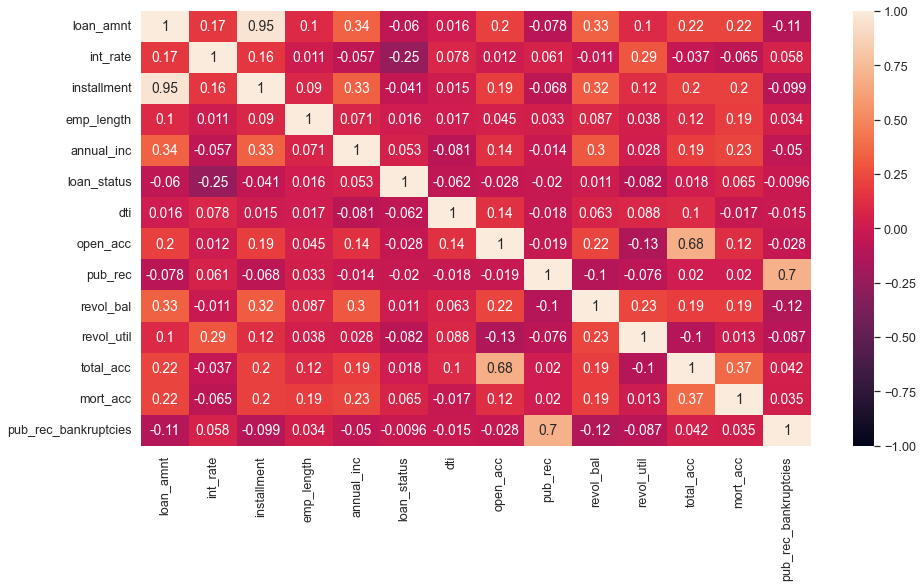

In [89]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1)

In [90]:
## spearman correlation matrix for heat map, used for better understanding 
df.corr('spearman')

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.130712,0.968277,0.105986,0.488773,-0.062917,0.052588,0.214908,-0.100960,0.470003,0.104408,0.236990,0.221089,-0.108774
int_rate,0.130712,1.000000,0.136487,0.009319,-0.097035,-0.244735,0.171042,0.004266,0.072066,0.005885,0.303841,-0.051039,-0.096216,0.061118
installment,0.968277,0.136487,1.000000,0.097272,0.470719,-0.049302,0.054946,0.207536,-0.093833,0.460538,0.131416,0.216561,0.193439,-0.103003
emp_length,0.105986,0.009319,0.097272,1.000000,0.146721,0.016327,0.038266,0.055274,0.044132,0.131807,0.037411,0.130886,0.213198,0.038164
annual_inc,0.488773,-0.097035,0.470719,0.146721,1.000000,0.086415,-0.203025,0.240503,-0.046616,0.393521,0.060080,0.334491,0.360282,-0.071756
loan_status,-0.062917,-0.244735,-0.049302,0.016327,0.086415,1.000000,-0.127765,-0.027379,-0.018615,-0.002708,-0.080568,0.020470,0.074892,-0.008591
dti,0.052588,0.171042,0.054946,0.038266,-0.203025,-0.127765,1.000000,0.322753,-0.043014,0.249446,0.184545,0.236553,-0.040152,-0.033194
open_acc,0.214908,0.004266,0.207536,0.055274,0.240503,-0.027379,0.322753,1.000000,-0.019829,0.363311,-0.139538,0.672254,0.139271,-0.025739
pub_rec,-0.100960,0.072066,-0.093833,0.044132,-0.046616,-0.018615,-0.043014,-0.019829,1.000000,-0.210299,-0.095692,0.033043,0.035118,0.862537
revol_bal,0.470003,0.005885,0.460538,0.131807,0.393521,-0.002708,0.249446,0.363311,-0.210299,1.000000,0.419166,0.293912,0.227060,-0.205991


<AxesSubplot:>

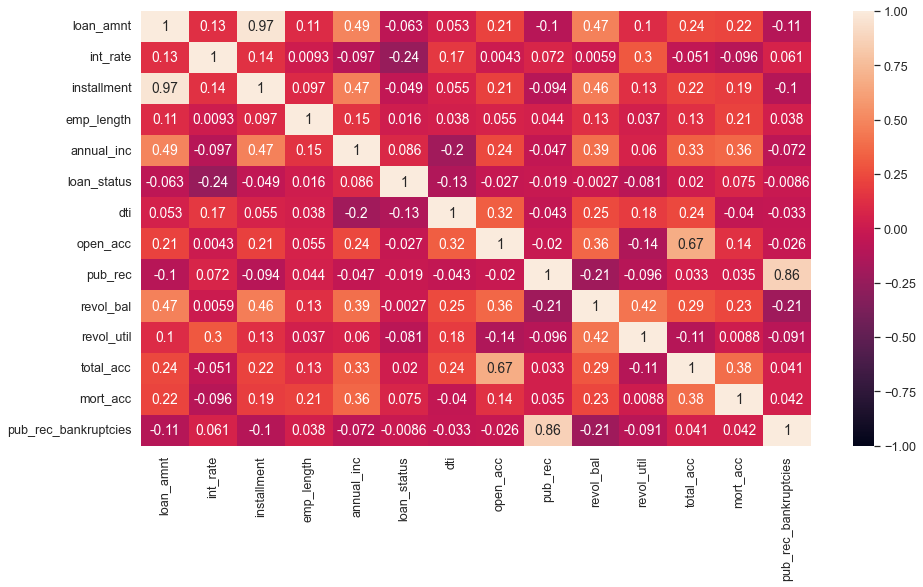

In [91]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,8))
sns.heatmap(df.corr('spearman'),annot=True,vmin=-1, vmax=1)

# Observations:

* More than 90% of people from Grade A got loan approved.
* Tenure with 36 months got loan approved more.
* Joint type Applications got approved more compared to Individual.
* Applicant with more Loan amount usually chooses long tenure like 60 months for repay.
* People from Grade G took highest amount of loan amount compared to other grades of people.
* annual income and loan status are correlated according to heatmap.

# Data Preparation for Modeling

# Label and Target Encoding

In [93]:
# Converting term into 
df['term']=df['term'].apply(lambda x:x.split(' ')[1])
df['term']=df['term'].astype(int)

In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['grade'] = le.fit_transform(df.grade)
df['home_ownership'] = le.fit_transform(df.home_ownership)
df['verification_status'] = le.fit_transform(df.verification_status)
df['initial_list_status'] = le.fit_transform(df.initial_list_status)
df['application_type'] = le.fit_transform(df.application_type)
df['sub_grade'] = le.fit_transform(df.sub_grade)
df['address'] = le.fit_transform(df.address)

In [ ]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

df['emp_title'] = encoder.fit_transform(df['emp_title'],df['loan_status'])
df['purpose'] = encoder.fit_transform(df['purpose'],df['loan_status'])
df['title'] = encoder.fit_transform(df['title'],df['loan_status'])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393465 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393465 non-null  float64
 1   term                  393465 non-null  int32  
 2   int_rate              393465 non-null  float64
 3   installment           393465 non-null  float64
 4   grade                 393465 non-null  int32  
 5   sub_grade             393465 non-null  int32  
 6   emp_title             393465 non-null  float64
 7   emp_length            393465 non-null  int32  
 8   home_ownership        393465 non-null  int32  
 9   annual_inc            393465 non-null  float64
 10  verification_status   393465 non-null  int32  
 11  loan_status           393465 non-null  int64  
 12  purpose               393465 non-null  float64
 13  title                 393465 non-null  float64
 14  dti                   393465 non-null  float64
 15  

# Handling Outliers

In [123]:
def detect_outliers(data):
    length_before=len(data)
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    if lower_bound<0:
        lower_bound=0
    length_after=len(data[(data>lower_bound)&(data<upper_bound)])
    data=data[(data<=upper_bound) & (data>=lower_bound)]
    print('After applying IQR Method')
    return f"{np.round((length_before-length_after)/length_before,3)}% outliers data found"



In [124]:
print("Before applying IQR Method:")
for col in df.columns:
    print(col,":", detect_outliers(df[col]))

Before applying IQR Method:
After applying IQR Method
loan_amnt : 0.0% outliers data found
After applying IQR Method
term : 1.0% outliers data found
After applying IQR Method
int_rate : 0.009% outliers data found
After applying IQR Method
installment : 0.028% outliers data found
After applying IQR Method
grade : 0.17% outliers data found
After applying IQR Method
sub_grade : 0.036% outliers data found
After applying IQR Method
emp_title : 0.169% outliers data found
After applying IQR Method
emp_length : 0.08% outliers data found
After applying IQR Method
home_ownership : 0.0% outliers data found
After applying IQR Method
annual_inc : 0.042% outliers data found
After applying IQR Method
verification_status : 0.315% outliers data found
After applying IQR Method
loan_status : 1.0% outliers data found
After applying IQR Method
purpose : 0.014% outliers data found
After applying IQR Method
title : 0.113% outliers data found
After applying IQR Method
dti : 0.001% outliers data found
After ap

In [125]:
detect_outliers(df)

After applying IQR Method


'0.0% outliers data found'

In [192]:
def handle_outliers(data):
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    if lower_bound<0:
        lower_bound=0
    data=data[(data<=upper_bound) & (data>=lower_bound)]
    return data.to_frame()

In [213]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'title', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [224]:
#excluding loan_status from removing outliers as it is Target Variable
col_list=['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'title', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address']
df1=pd.DataFrame()
df1=df['loan_status'].to_frame()
for col in col_list:
    df1=df1.merge(handle_outliers(df[col]),how='outer',left_index=True,right_index=True)

df1.head()

,loan_status,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,1,10000.0,36.0,11.44,329.48,1,8.0,0.752809,10,5,...,16.0,0.0,36369.0,41.8,25.0,1,1.0,0.0,0.0,3
1,1,8000.0,36.0,11.99,265.68,1,9.0,0.683015,4,1,...,17.0,0.0,20131.0,53.3,27.0,0,1.0,3.0,0.0,1
2,1,15600.0,36.0,10.49,506.97,1,7.0,0.818181,0,5,...,13.0,0.0,11987.0,92.2,26.0,0,1.0,0.0,0.0,1
3,1,7200.0,36.0,6.49,220.65,0,1.0,0.803810,6,5,...,6.0,0.0,5472.0,21.5,13.0,0,1.0,0.0,0.0,0
4,0,24375.0,NaN,17.27,609.33,2,14.0,0.803810,9,1,...,13.0,0.0,24584.0,69.8,43.0,0,1.0,1.0,0.0,2


In [225]:
df1.shape

(393465, 25)

In [226]:
df1=df1.dropna()

In [227]:
df1.shape

(155368, 25)

# Logistic Regression

In [228]:
targets = df1['loan_status']
features = df1.drop(columns = {'loan_status'})

In [229]:
# splitting the data into train and test with some test size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2,random_state=42)

In [230]:
# scaling the X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [238]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#training the Model
model.fit(X_train,y_train)

#Predicting with X_test values
y_pred = model.predict(X_test)

#accuracy score
accuracy=model.score(X_train, y_train)

print(f'Coefficients: { model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'accuracy score: {accuracy}')

Coefficients: [[ 0.51721057  0.          0.32554901 -0.61003654 -0.04153293 -0.6498652
   0.28124219  0.0120861  -0.09891465  0.1633385  -0.02626051 -0.02758409
   0.09323381 -0.13501248 -0.13308984  0.          0.05177277 -0.14929158
   0.07596488  0.030641    0.          0.03270474  0.         -0.96902112]]
Intercept: [2.07753337]
accuracy score: 0.8551418411186381


In [233]:
coefficients=pd.DataFrame(model.coef_.reshape(1,-1),columns=features.columns)
coefficients.T

,0
loan_amnt,0.517211
term,0.000000
int_rate,0.325549
installment,-0.610037
grade,-0.041533
sub_grade,-0.649865
emp_title,0.281242
emp_length,0.012086
home_ownership,-0.098915
annual_inc,0.163338


# Logistic Regression using StatsModel Library

* coef : the coefficients of the independent variables in the regression equation.
* Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.
* LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).

In [234]:
features.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'title', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [235]:
Xtrain = df[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'title', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address']]
ytrain = df[['loan_status']]

In [236]:
import statsmodels.api as sm
model1 = sm.Logit(ytrain, Xtrain).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.366137
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               393465
Model:                          Logit   Df Residuals:                   393441
Method:                           MLE   Df Model:                           23
Date:                Sat, 14 Jan 2023   Pseudo R-squ.:                  0.2604
Time:                        12:51:18   Log-Likelihood:            -1.4406e+05
converged:                       True   LL-Null:                   -1.9479e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
loan_amnt             1.073e-05   3.96e-06      2.707      0.007    2.96e-06    1.85e-05

In [239]:
from sklearn.feature_selection import RFE
rfe = RFE(model,n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [240]:
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True False  True  True False  True  True False False
 False  True False False False  True False False False False False  True]
[ 1 15  1  1  6  1  1 11  1  1 10  9  4  1  2 14  5  1  3  8 12  7 13  1]


In [241]:
rfe=pd.DataFrame(rfe.ranking_.reshape(1,-1),columns=features.columns)
rfe.T

,0
loan_amnt,1
term,15
int_rate,1
installment,1
grade,6
sub_grade,1
emp_title,1
emp_length,11
home_ownership,1
annual_inc,1


# Observations:

* Now we can Consider only columns with rfe score of 1
* 'loan_amnt', 'int_rate','emp_title', 'installment','sub_grade', 'home_ownership', 'annual_inc', 'dti','revol_util',         'address'  these columns are considered further.

In [245]:
targets = df1['loan_status']
features =df1[['loan_amnt', 'int_rate','emp_title', 'installment','sub_grade', 
               'home_ownership', 'annual_inc', 'dti','revol_util','address']]

In [248]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(features, targets, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)

In [249]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [250]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
    scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = scaled_lr.score(X_train, y_train)
    val_score = scaled_lr.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

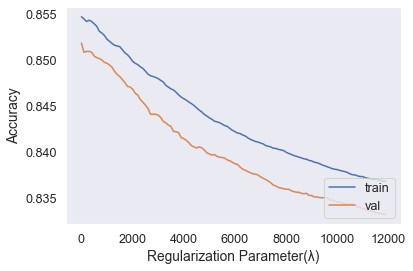

In [251]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [252]:
np.argmax(val_scores)

0

In [253]:
val_scores[0]

0.8518375490763983

In [254]:
l_best=0.01*1*100
l_best

1.0

* we use lambda value as 1/l_best in Logistcic Regression as it is 1 we can keep it as normal

In [255]:
# splitting the data into train and test with some test size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2,random_state=42)

In [256]:
# scaling the X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [257]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#training the Model
model.fit(X_train,y_train)

#Predicting with X_test values
y_pred = model.predict(X_test)

#accuracy score
accuracy=model.score(X_train, y_train)

print(f'Coefficients: { model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'accuracy score: {accuracy}')

Coefficients: [[ 0.56710346  0.37996176  0.2829747  -0.65349517 -0.76655327 -0.12270045
   0.17020418 -0.15401739 -0.10492074 -0.96918406]]
Intercept: [2.07055563]
accuracy score: 0.8546832510016573


In [258]:
coefficients=pd.DataFrame(model.coef_.reshape(1,-1),columns=features.columns)
coefficients

,loan_amnt,int_rate,emp_title,installment,sub_grade,home_ownership,annual_inc,dti,revol_util,address
0,0.567103,0.379962,0.282975,-0.653495,-0.766553,-0.1227,0.170204,-0.154017,-0.104921,-0.969184


In [259]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,precision_score,recall_score,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 1070,  4108],
       [  465, 25431]], dtype=int64)

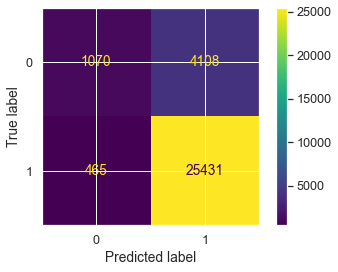

In [260]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
...                               display_labels=model.classes_)
disp.plot()
plt.show()

* TN=True Negatives
* TP=True Positives
* FN=False Negatives
* FP=False Positives

In [262]:
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('True Negatives',TN)
print('True Positives',TP)
print('False Positives',FP)
print('False Negatives',FN)

True Negatives 1070
True Positives 25431
False Positives 4108
False Negatives 465


In [263]:
# calculating Accuracy
def Accuracy(TN,TP,FP,FN):
    ans=(TN+TP)/(TN+TP+FP+FN)
    return ans

In [264]:
Accuracy(TN,TP,FP,FN)

0.8528351676642852

# Observations:

* By Comparing, false positives are less than true positives.
* By Comparing, false negatives are less than true negatives.
* Accuracy of 85% is seen.

In [265]:
Precision=precision_score(y_test,y_pred)
Precision

0.8609296184704966

# Observations:

* precision here is 0.83 which is good. Bad precision means we will get False positives.
* This will lead to giving loan to people who couldnot pay.This will lead to NPA. so precision help us lower down Bank NPA


In [266]:
Recall=recall_score(y_test,y_pred)
Recall

0.9820435588507878

# Observations:

* Recall is also good. Bad recall means more false negatives. This will lead to losing Important customers.
* good recall will ensure that we will not lose any important customers.


In [268]:
# Calculating F1 Score
def F1_score(Precision,Recall):
    ans=2*(Precision*Recall)/(Precision+Recall)
    return ans

In [269]:
F1_score=F1_score(Precision,Recall)
F1_score

0.917506990168666

In [270]:
probs=model.predict_proba(X_test)[:,1]

roc_auc_score: 0.7758792620641521


Text(0, 0.5, 'True Positive Rate')

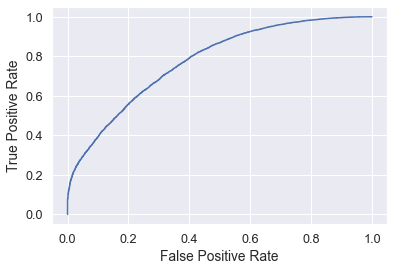

In [271]:
# ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thres=roc_curve(y_test,probs)
plt.plot(fpr,tpr)
print('roc_auc_score:',roc_auc_score(y_test,probs))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Observations:

* Here, AUC score is greater than 0.50. it means our model can predict the positive & Negative class well. 
* Max score can be 1 but we got 0.77.
* Our Model is doing Great according to this Area under curve

f1 score 0.917506990168666


Text(0, 0.5, 'Precision')

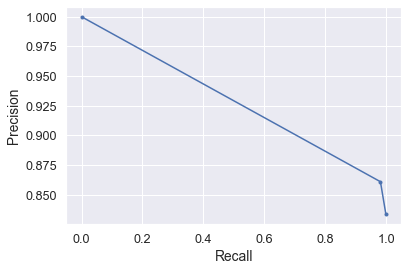

In [272]:
# Precision-Recall Curve
from sklearn.metrics import auc,precision_recall_curve,f1_score
lr_precision, lr_recall, _ = precision_recall_curve(y_test,y_pred)
lr_f1 = f1_score(y_test, y_pred)
auc(lr_recall,lr_precision)
print("f1 score",lr_f1)
plt.plot(lr_recall,lr_precision,marker='.')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Observations:

* F1 score is 0.917 which is very high
* According to this curve we get that There are high Precision and High Recall.
* This implies there are less false positives and false negatives.

# Trade off Questions:

#1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

* To keep very less False Positives, oversampling techniques like SMOTE should be used in model creation.
* As you can see from the data, the percentage of defaulters is slightly higher than Banking industry.

#2.   Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

*  Yes. LoanTap should not disburse loans to everyone. From data provided, 20% of people default on their loan, which inturn become NPAs for the company.(so need to identify exact persons).
* Low False positive means we should create the model with high Precision values. This can be achieved if we are keeping high threshold value in logistic Regression model.(so need to keep high presicion high for LoanTap).
* But keeping too high values for threshold will increase False Negatives. This intuen may result in opportunity loss.(so keep a eye on F1 score which balances both FN and FP)

# Questionnaire

#1. What percentage of customers have fully paid their Loan Amount?

* Around 80.26% of customers have fully paid their Loan Amount(calculated by value_counts(normalize=True) 

#2. Comment about the correlation between Loan Amount and Installment features.

*  They are high Correlated with value of 0.97 (calculated by spearmann coorelation matrix)

#3. The majority of people have home ownership as _______.

*  MORTAGAGE (calculated by countplot)

#4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

*  True , over 90% got loan Approved(calculated by bar plot in bivariate analysis).

#5. Name the top 2 afforded job titles.

* Teacher and Manager(calculated by Value_counts for emp_title column)

#6. Thinking from a bank's perspective, which metric should our primary focus be on..
    * ROC AUC
    * Precision
    * Recall
    * F1 Score

* F1 Score, because we need to improve both Precision and Recall(for not to miss potential customers)

#7. How does the gap in precision and recall affect the bank?

*  Recall score is 0.98 and Precision score is 0.86 (means False Positives(FP) are more than False Negatives(FN))
*  If Recall value is low (i.e. FN are high), it means Bank is loosing in opportunity cost.
*  If Precision value is low (i.e. FP are high), it means Bank's NPA (defaulters) may increase

 #8. Which were the features that heavily affected the outcome?
 
 * Top 10 features according to RFE(Recursive Feature Elimination) Technique
     * 'loan_amnt', 'int_rate','emp_title', 'installment','sub_grade', 'home_ownership', 'annual_inc',                                 'dti','revol_util','address'

#9. Will the results be affected by geographical location? (Yes/No)

* Yes, pincode(derived from address).

# Actionable insights

* No Duplicates records are found
* some missing and outliers are found later imputed them.
* More than 90% of people from Grade A got loan approved.
* Tenure with 36 months got loan approved more.
* Joint type Applications got approved more compared to Individual.
* Applicant with more Loan amount usually chooses long tenure like 60 months for repay.
* People from Grade G took highest amount of loan amount compared to other grades of people.
* annual income and loan status are correlated according to heatmap.
* Overall Statistics of the Model:
    * Accuracy = 0.852
    * Precision = 0.860
    * Recall = 0.982
    * F1 -score = 0.917
* Model created has high values for accuracy, precision, recall & f1-score. This means, this model is a good classifier.
* Around 80.26% of customers have fully paid their Loan Amount.
* The defaulters are ~ 20%. 
* Top 10 features according to RFE(Recursive Feature Elimination) Technique
     * 'grade', 'sub_grade','emp_title', 'home_ownership','verification_status', 'purpose', 'title', 'dti','application_type','address'
* Pincode is having some impact on model
	* pincode with  05113, 29597,00813 are having high loan approved areas.

# Recommendations

* There are some Areas where loan is fully paid by customers try to give loan in that areas.
* customers in role of Teacher and Manager paid the loan so try to give to that kind of customers.
* In Joint Loan application the count of Loan paid applicants are more try to push individual applicants into joint , this can reduce the defaulters percentage
* LoanTap should focus more on Loans for shorter duration (i.e. 36 months). because there is more percentage of fully paid applicants.
* LoanTap should not give loan based on customers annual income because we can see that there is no proper evidence that more annual income will pay the loan.